In [1]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

data = pd.read_csv('/content/metadata.csv') 

# Filter rows where 'plume' is 'yes'
plume_data = data[data['plume'] == 'yes']

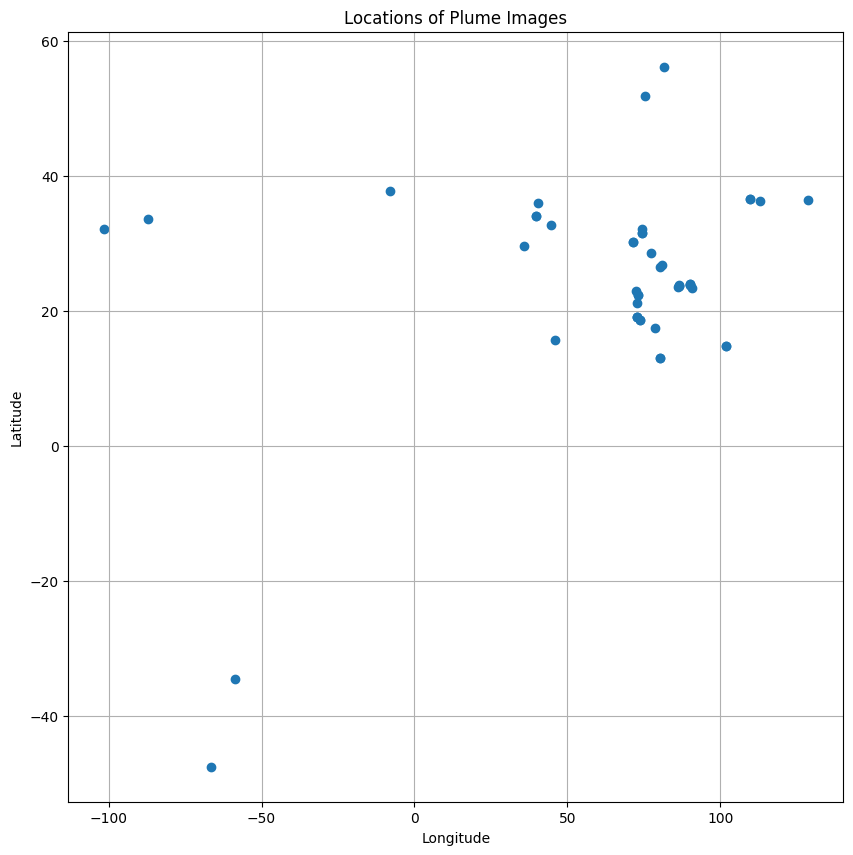

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(plume_data['lon'], plume_data['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of Plume Images')
plt.grid(True)
plt.show()


In [4]:
import folium

In [5]:
# Create a Map
m = folium.Map(location=[0, 0], zoom_start=2, tiles='OpenStreetMap')

# Add points to the map instance
for idx, row in plume_data.iterrows():
    folium.CircleMarker(location=[row['lat'], row['lon']], radius=2, color='blue', fill=True, fill_color='blue').add_to(m)

# Show the map
m


In [6]:
import requests
import time

def get_location_by_coordinates(lat, lon):
    url = f"https://geocode.maps.co/reverse?lat={lat}&lon={lon}"
    response = requests.get(url)
    data = response.json()  # Convert response to JSON
    country = data.get('address', {}).get('country')  # Extract country from JSON
    time.sleep(0.5)  # Add delay to respect rate limit
    return country

# Filter dataframe to only include rows where plume='yes'
plume_yes_data = plume_data[plume_data['plume'] == 'yes']

# Get country information for each location
plume_yes_data['country'] = plume_yes_data.apply(lambda row: get_location_by_coordinates(row['lat'], row['lon']), axis=1)

# Count occurrences of each country
country_counts = plume_yes_data['country'].value_counts()



In [7]:
# Display the country counts
print(country_counts)

India            19
বাংলাদেশ          5
پاکستان           5
中国                3
سوريا             3
ประเทศไทย         2
United States     2
Argentina         2
اليمن             1
الأردن            1
Portugal          1
Россия            1
대한민국              1
العراق            1
Қазақстан         1
Name: country, dtype: int64


In [8]:
# Print total count
total_count = country_counts.sum()
print(f'Total count of locations with plume: {total_count}')


Total count of locations with plume: 48
